In [1]:
import os
import numpy as np
import shutil
from PIL import Image
import matplotlib.pyplot as plt

In [127]:
image_path1 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_1/00006.jpg'
image_path2 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_1/00111.jpg'
image_path3 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_1/00161.jpg'
image_path4 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_1/00177.jpg'

# image_path1 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0/00000.jpg'
# image_path2 = '/scratch/tkg5kq/mmaction2/data/hmdb51/slices/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0/00070.jpg'


image1 = Image.open(image_path1).convert('L')
image2 = Image.open(image_path2).convert('L')
image3 = Image.open(image_path3).convert('L')
image4 = Image.open(image_path4).convert('L')

image_array1 = np.array(image1)
image_array2 = np.array(image2)
image_array3 = np.array(image3)
image_array4 = np.array(image4)

In [128]:
def compute_correlation(image_array):
    """
    Computes the correlation between consecutive columns in an image.
    :param image_array: numpy array representing the image
    :return: list of correlation coefficients between consecutive columns
    """
    correlations = []
    for i in range(image_array.shape[1] - 3):
        column1 = image_array[:, i]
        column2 = image_array[:, i + 1]
        correlation = np.corrcoef(column1, column2)[0, 1]
        correlations.append(correlation)
    return correlations

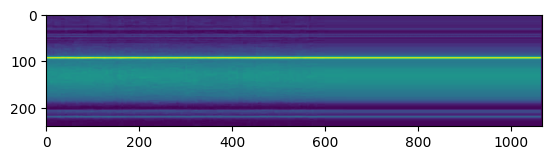

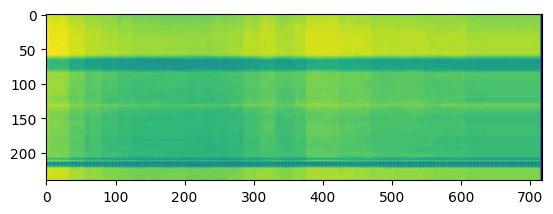

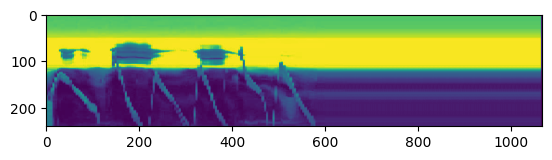

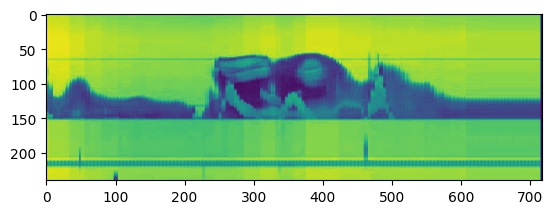

In [132]:
plt.figure()
plt.imshow(image_array1)
plt.show()

plt.figure()
plt.imshow(image_array2)
plt.show()

plt.figure()
plt.imshow(image_array3)
plt.show()

plt.figure()
plt.imshow(image_array4)
plt.show()

In [236]:
def calculate_image_variance(image_array, alpha=10):
    variances = []
    # col/alpha patches
    for i in range(image_array.shape[1]//alpha):
        col_variance = np.var(image_array[:, i*alpha:(i+1)*alpha])
        # slice_variance = np.var(image_array)
        # # print(slice_variance)
        variances.append(col_variance)

    if image_array.shape[1] % alpha != 0:
        col_variance = np.var(image_array[:, i*alpha:image_array.shape[1]])
        variances.append(col_variance)

    return variances

def process_images(input_dir, pruned_dir, variance_threshold=2000, correlation_threshold=0.99):
    """
    Processes all images in the input directory. Moves highly correlated images to the pruned directory.
    :param input_dir: directory containing images to process
    :param pruned_dir: directory to move highly correlated images to
    :param correlation_threshold: threshold above which correlations are considered high
    """
    # Create the pruned directory if it doesn't exist
    os.makedirs(pruned_dir, exist_ok=True)
   
    file_variances = {}
    for filename in sorted(os.listdir(input_dir)):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Add other image formats if necessary
            image_path = os.path.join(input_dir, filename)
            # import pdb; pdb.set_trace()
            image = Image.open(image_path).convert('L')  # Convert image to grayscale
            image_array = np.array(image)
            # correlations = compute_correlation(image_array)
            # if '71' in filename:
            #     import pdb; pdb.set_trace()
            # variances = calculate_image_variance(image_array)

            # if np.max(variances) < 2800:
            #     print(f"Remove {filename} {np.max(variances)}")
            # file_variances[filename] = variances
            file_variances[filename] = np.var(image_array)

            # if all(corr > correlation_threshold for corr in correlations):
            #     # If all correlations exceed the threshold, move the file to the pruned directory
            #     # shutil.move(image_path, os.path.join(pruned_dir, filename))
            #     # import pdb; pdb.set_trace()
            #     print(f"{filename} {np.min(correlations)}")
            # else:
            #     print(f'No move {filename} {correlations}')

    beta = 200
    variances_list = list(file_variances.values())
    mean = np.mean(variances_list)
    min_var = np.min(variances_list)
    for filename in file_variances:
        variance = file_variances[filename]
        if variance < (((mean)+min_var)/2)-beta:
            shutil.move(os.path.join(input_dir, filename), os.path.join(pruned_dir, filename))
            # print(os.path.join(input_dir, filename), os.path.join(pruned_dir, filename))

    return file_variances

input_directory = "/scratch/tkg5kq/mmaction2/data/hmdb51/slices/"  # Replace with your input directory
pruned_directory = "/scratch/tkg5kq/mmaction2/data/hmdb51/pruned_slices/"  # Replace with your pruned directory
# threshold = .97 # brush
threshold = 2000

os.makedirs(os.path.dirname(pruned_directory), exist_ok=True)
label_list = [ name for name in sorted(os.listdir(input_directory)) if os.path.isdir(os.path.join(input_directory, name)) ]
for label in label_list:
    input_label_dir = os.path.join(input_directory, label)
    pruned_label_dir = os.path.join(pruned_directory, label)
    os.makedirs(pruned_label_dir, exist_ok=True)

    video_list = [ name for name in sorted(os.listdir(input_label_dir)) if os.path.isdir(os.path.join(input_label_dir, name)) ]
    for video in video_list:
        input_video_dir = os.path.join(input_label_dir, video)
        pruned_video_dir = os.path.join(pruned_label_dir, video)
        os.makedirs(pruned_video_dir, exist_ok=True)
        variances = process_images(input_video_dir, pruned_video_dir, threshold)

KeyboardInterrupt: 

In [3]:
def calculate_image_variance(image_array, alpha=10):
    variances = []
    # col/alpha patches
    for i in range(image_array.shape[1]//alpha):
        col_variance = np.var(image_array[:, i*alpha:(i+1)*alpha])
        # slice_variance = np.var(image_array)
        # # print(slice_variance)
        variances.append(col_variance)

    if image_array.shape[1] % alpha != 0:
        col_variance = np.var(image_array[:, i*alpha:image_array.shape[1]])
        variances.append(col_variance)

    return variances

def process_images(input_dir, pruned_dir, variance_threshold=2000, correlation_threshold=0.99):
    """
    Processes all images in the input directory. Moves highly correlated images to the pruned directory.
    :param input_dir: directory containing images to process
    :param pruned_dir: directory to move highly correlated images to
    :param correlation_threshold: threshold above which correlations are considered high
    """
    # Create the pruned directory if it doesn't exist
    os.makedirs(pruned_dir, exist_ok=True)
   
    file_variances = {}
    for filename in sorted(os.listdir(input_dir)):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Add other image formats if necessary
            image_path = os.path.join(input_dir, filename)
            # import pdb; pdb.set_trace()
            image = Image.open(image_path).convert('L')  # Convert image to grayscale
            image_array = np.array(image)
            # correlations = compute_correlation(image_array)
            # if '71' in filename:
            #     import pdb; pdb.set_trace()
            # variances = calculate_image_variance(image_array)

            # if np.max(variances) < 2800:
            #     print(f"Remove {filename} {np.max(variances)}")
            # file_variances[filename] = variances
            file_variances[filename] = np.var(image_array)

            # if all(corr > correlation_threshold for corr in correlations):
            #     # If all correlations exceed the threshold, move the file to the pruned directory
            #     # shutil.move(image_path, os.path.join(pruned_dir, filename))
            #     # import pdb; pdb.set_trace()
            #     print(f"{filename} {np.min(correlations)}")
            # else:
            #     print(f'No move {filename} {correlations}')

    beta = 200
    variances_list = list(file_variances.values())
    mean = np.mean(variances_list)
    min_var = np.min(variances_list)
    for filename in file_variances:
        variance = file_variances[filename]
        if variance < (((mean)+min_var)/2)-beta:
            shutil.move(os.path.join(input_dir, filename), os.path.join(pruned_dir, filename))
            # print(os.path.join(input_dir, filename), os.path.join(pruned_dir, filename))

    return file_variances

input_directory = "/scratch/tkg5kq/mmaction2/data/hmdb51/slices/"  # Replace with your input directory
pruned_directory = "/scratch/tkg5kq/mmaction2/data/hmdb51/pruned_slices/"  # Replace with your pruned directory
# threshold = .97 # brush
threshold = 2000

os.makedirs(os.path.dirname(pruned_directory), exist_ok=True)
label_list = [ name for name in sorted(os.listdir(input_directory)) if os.path.isdir(os.path.join(input_directory, name)) ]
for label in label_list:
    input_label_dir = os.path.join(input_directory, label)
    pruned_label_dir = os.path.join(pruned_directory, label)
    os.makedirs(pruned_label_dir, exist_ok=True)

    video_list = [ name for name in sorted(os.listdir(input_label_dir)) if os.path.isdir(os.path.join(input_label_dir, name)) ]
    for video in video_list:
        input_video_dir = os.path.join(input_label_dir, video)
        pruned_video_dir = os.path.join(pruned_label_dir, video)
        os.makedirs(pruned_video_dir, exist_ok=True)
        variances = process_images(input_video_dir, pruned_video_dir, threshold)



KeyboardInterrupt: 

In [4]:
for label in sorted(label_list):
    print(label)
    input_label_dir = os.path.join(input_directory, label)
    pruned_label_dir = os.path.join(pruned_directory, label)
    video_list = [ name for name in sorted(os.listdir(pruned_label_dir)) if os.path.isdir(os.path.join(pruned_label_dir, name)) ]
    for video in sorted(video_list):
        print(f'\t{video}')
        input_video_dir = os.path.join(input_label_dir, video)
        pruned_video_dir = os.path.join(pruned_label_dir, video)
        for filename in sorted(os.listdir(pruned_video_dir)):
            shutil.move(os.path.join(pruned_video_dir, filename), os.path.join(input_video_dir, filename))

brush_hair
	April_09_brush_hair_u_nm_np1_ba_goo_0
	April_09_brush_hair_u_nm_np1_ba_goo_1
	April_09_brush_hair_u_nm_np1_ba_goo_2
	Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np1_ba_goo_4
	Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np1_ri_med_3
	Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_0
	Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_1
	Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_med_2
	Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_ba_med_3
	Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_1
	Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_2
	Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_med_0
	Blonde_being_brushed_brush_hair_f_nm_np2_ri_med_0
	Blonde_being_brushed_brush_hair_u_cm_np2_ri_med_1
	Brunette_Foxyanya_ultra_silky_long_hair_brushing_hairjob_brush_hair_f_nm_np1_fr_goo_1
	Brunette_Foxyanya_ultra_silky_long_hair_brushing_hairjob_brush_hair_f_nm_np1_fr_goo_2
	Brunette_Foxyanya_ul

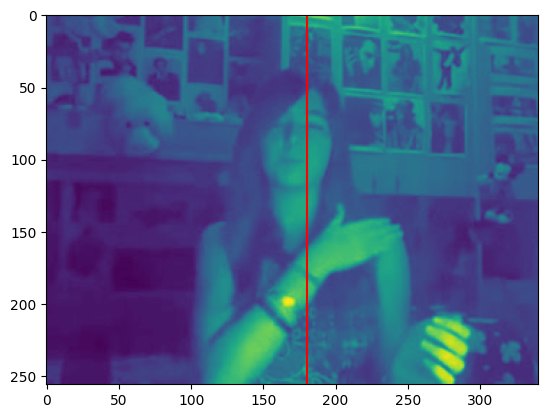

In [191]:
image_path1 = '/scratch/tkg5kq/mmaction2/data/hmdb51/frames/clap/_Boom_Snap_Clap__challenge_clap_u_nm_np1_fr_med_0/00001.jpg'

image1 = Image.open(image_path1).convert('L')

image_array1 = np.array(image1)

plt.figure()
plt.imshow(image1)
plt.axvline(x=180, color='r')
plt.show()

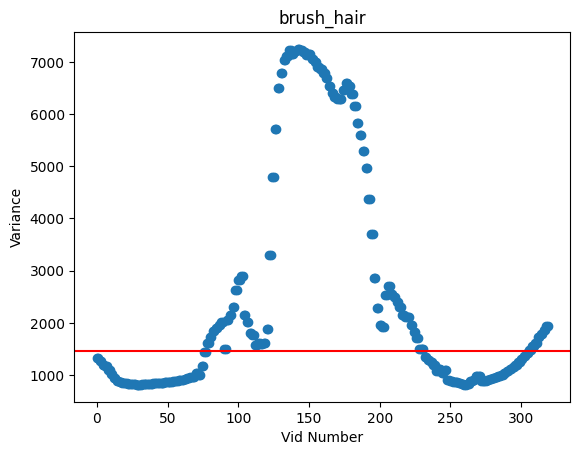

Eliminate 00000.jpg
Eliminate 00001.jpg
Eliminate 00002.jpg
Eliminate 00003.jpg
Eliminate 00004.jpg
Eliminate 00005.jpg
Eliminate 00006.jpg
Eliminate 00007.jpg
Eliminate 00008.jpg
Eliminate 00009.jpg
Eliminate 00010.jpg
Eliminate 00011.jpg
Eliminate 00012.jpg
Eliminate 00013.jpg
Eliminate 00014.jpg
Eliminate 00015.jpg
Eliminate 00016.jpg
Eliminate 00017.jpg
Eliminate 00018.jpg
Eliminate 00019.jpg
Eliminate 00020.jpg
Eliminate 00021.jpg
Eliminate 00022.jpg
Eliminate 00023.jpg
Eliminate 00024.jpg
Eliminate 00025.jpg
Eliminate 00026.jpg
Eliminate 00027.jpg
Eliminate 00028.jpg
Eliminate 00029.jpg
Eliminate 00030.jpg
Eliminate 00031.jpg
Eliminate 00032.jpg
Eliminate 00033.jpg
Eliminate 00034.jpg
Eliminate 00035.jpg
Eliminate 00036.jpg
Eliminate 00037.jpg
Eliminate 00038.jpg
Eliminate 00039.jpg
Eliminate 00040.jpg
Eliminate 00041.jpg
Eliminate 00042.jpg
Eliminate 00043.jpg
Eliminate 00044.jpg
Eliminate 00045.jpg
Eliminate 00046.jpg
Eliminate 00047.jpg
Eliminate 00048.jpg
Eliminate 00049.jpg


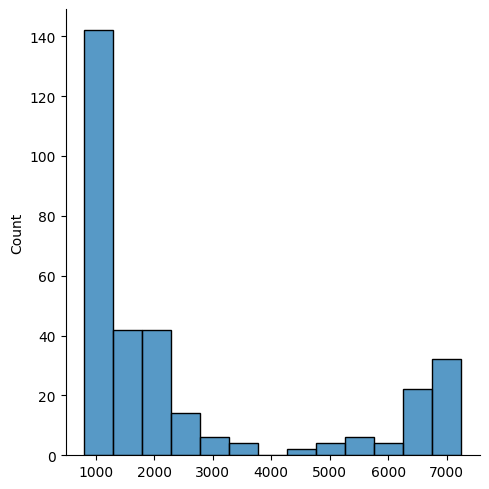

In [231]:
import seaborn as sns

variances_list = list(variances.values()) #list(variances.values())/np.max(list(variances.values()))

beta = 200

index = 319
plt.figure()
plt.title(label)
plt.scatter(range(len(variances_list)), variances_list)
plt.xlabel('Vid Number')
plt.ylabel('Variance')
plt.axhline(y=(((np.mean(variances_list))+np.min(variances_list))/2) - beta, color='r')
plt.show()

mean = np.mean(variances_list)
min_var = np.min(variances_list)
for filename in variances:
    variance = variances[filename]
    if variance < ((mean)+min_var) - beta/2:
        print(f'Eliminate {filename}')


sns.displot(np.array(variances_list))
# index = 180
# plt.figure()
# plt.title(index)
# plt.scatter(range(len(variances_list[index])), variances_list[index])
# plt.show()
# sns.displot(np.array(variances_list[index]))

# index = 208
# plt.figure()
# plt.title(index)
# plt.scatter(range(len(variances_list[index])), variances_list[index])
# plt.show()
# sns.displot(np.array(variances_list[index]))


In [ ]:
for 

In [131]:
print(np.var(image_array1))
print(np.var(image_array2))
print(np.var(image_array3))
print(np.var(image_array4))

1001.56382953389
712.3419542203321
9917.216434305901
3365.4998403700447


In [120]:
correlations1 = compute_correlation(image_array1)
correlations2 = compute_correlation(image_array2)

print(f'Picture 71: {np.min(correlations1)}')
print(f'Picture 0:  {np.min(correlations2)}')

Picture 71: 0.9928915677762413
Picture 0:  0.8099191703245703


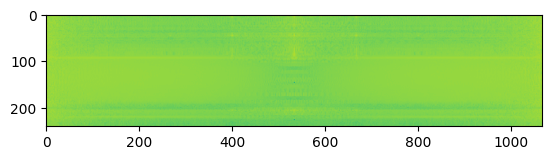

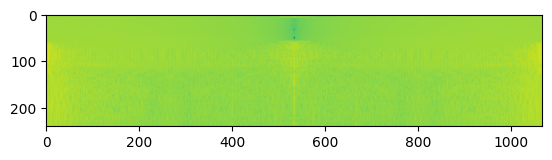

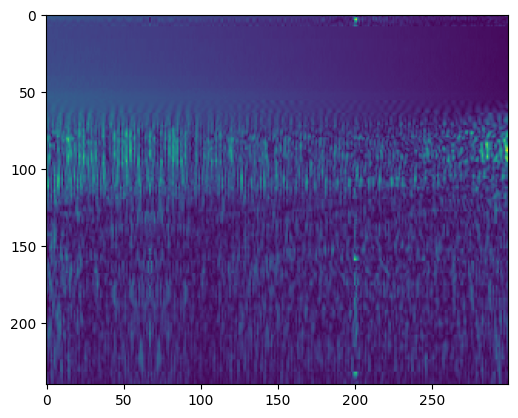

AttributeError: module 'numpy' has no attribute 'mode'

In [124]:
img1_fft = np.abs(np.fft.fft(image_array1))
img2_fft = np.abs(np.fft.fft(image_array2))

img1_fft = img1_fft/np.max(img1_fft)
img2_fft = img2_fft/np.max(img2_fft)

log_fft1 = np.log(img1_fft)
log_fft2 = np.log(img2_fft)

plt.figure()
plt.imshow(np.log(img1_fft))
plt.show()

plt.figure()
plt.imshow(np.log(img2_fft))
plt.show()

plt.figure()
plt.imshow(img2_fft[:, 200:500])
plt.show()

print(f'Image1: min {np.min(log_fft1)} max {np.mode(log_fft1)}')
print(f'Image2: min {np.min(log_fft2)} max {np.mode(log_fft2)}')

print(img1_fft)